# Logistic and Exponential Modeling for COVID-19

### Importing the needed libraries

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from IPython import get_ipython
import requests
import io
import warnings
warnings.filterwarnings("ignore")
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')

### Getting the cumulative count dataset

In [8]:
url = 'http://raw.githubusercontent.com/cepulmano/covid-modeling/master/covid-19-031520.csv'
request = requests.get(url=url, verify=False).content 
df = pd.read_csv(io.StringIO(request.decode('utf8')))

### Defining the logistic and exponential model equations

In [9]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

### Running the logistic and exponential models

In [10]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,2])
fit = curve_fit(logistic_model,x,y)

a = fit[0][0] # a refers to the infection speed
b = fit[0][1] # b is the day with the maximum infections occurred
c = fit[0][2] # c is the total number of recorded infected people at the infection’s end

errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]

sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))

print("Infection speed: {0}".format(a))
print("Day with maximum infections occured: {0}".format(b))
print("Total number of record infected people at the infection's end: {0}".format(c))
print("End of infection in Day #: {0}".format(sol))

Infection speed: 2.6125558152414343
Day with maximum infections occured: 76.2500850078483
Total number of record infected people at the infection's end: 368.8437351476407
End of infection in Day #: 92


In [11]:
exp_fit = curve_fit(exponential_model,x,y,p0=[1,1,1], maxfev=5000)

### Plotting the model outputs

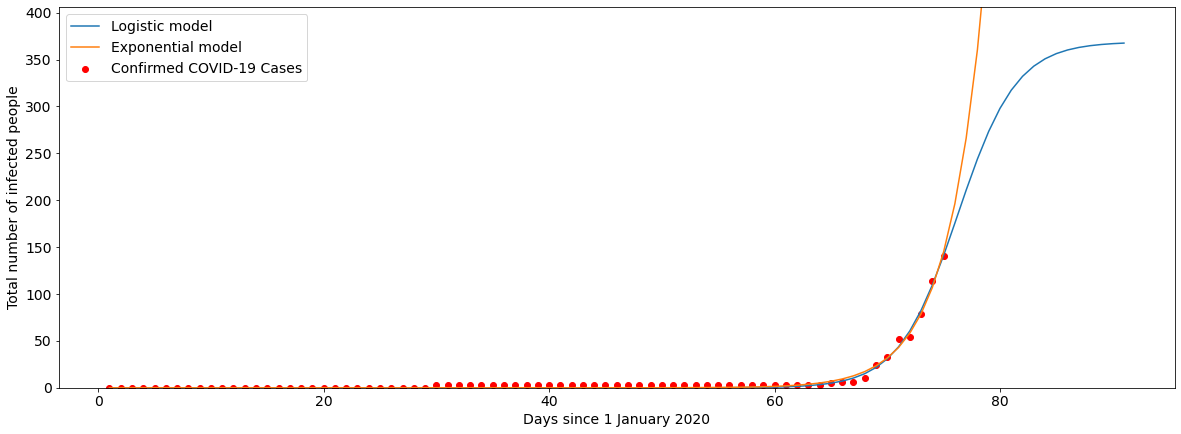

In [12]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [20,7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Confirmed COVID-19 Cases",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )
# Predicted exponential curve
plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
plt.legend()
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,(c*1.1)))
plt.show()